## 프로젝트: 다양한 OCR모델 비교하기

## 검증용 데이터셋 준비

이미지가 많을수록 좋겠지만 검증해야 할 항목별로 고루 갖춰지는 것도 중요합니다. 20장정도

In [37]:
work_dir = './test_images/'
img_file_paths = []
for i in range(1,6):
    img_file_paths.append(work_dir+'test_image_{}.jpg'.format(i))

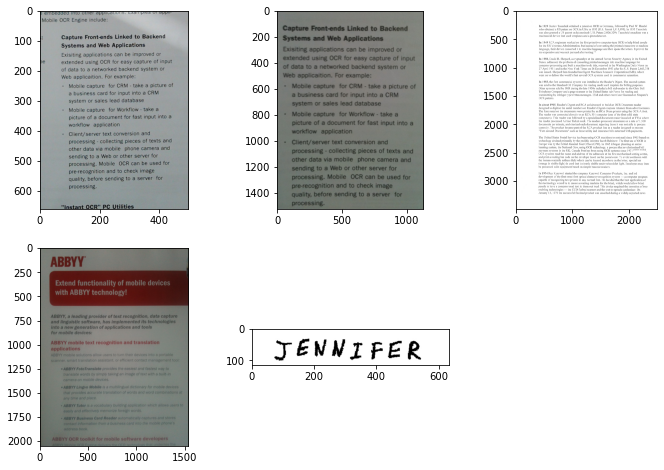

In [28]:
import matplotlib.pyplot as plt
%matplotlib inline
from os import listdir
from PIL import Image as PImage

def loadImages(path):
    
    imagesList = listdir(path)
    loadedImages = []
    for image in imagesList:
        img = PImage.open(path + image)
        loadedImages.append(img)

    return loadedImages

imgs = loadImages(work_dir)
plt.figure(figsize=(12, 8))
for idx,img in enumerate(imgs):
    plt.subplot(2,3,idx+1)   
    plt.imshow(img)

## Google OCR API, keras-ocr, Tesseract로 테스트 진행

### Google OCR API

In [2]:
def detect_text(path):
    """Detects text in the file."""
    from google.cloud import vision
    import io
    client = vision.ImageAnnotatorClient()

    with io.open(path, 'rb') as image_file:
        content = image_file.read()
        
    image = vision.Image(content=content)

    response = client.text_detection(image=image)
    texts = response.text_annotations
    print('Texts:')

    for text in texts:
       print('\n"{}"'.format(text.description))

    vertices = (['({},{})'.format(vertex.x, vertex.y)
                 for vertex in text.bounding_poly.vertices])

    print('bounds: {}'.format(','.join(vertices)))

    if response.error.message:
        raise Exception(
            '{}\nFor more info on error messages, check: '
            'https://cloud.google.com/apis/design/errors'.format(
                response.error.message))

In [3]:
import os
# 입력 이미지 경로를 지정해 주세요.
# [[YOUR IMAGE FILE PATH]]   ex.) '~/aiffel/ocr_python/test_image.png'
# path =os.getenv('HOME')+'/aiffel/ocr_python/test_image.jpg'
# 위에서 정의한 OCR API 이용 함수를 호출해 봅시다.
detect_text(path)

Texts:

&quot;Oof odprofil
1 Stück/pièce
(20g
431 kcal) |(86 kc 1 4%
0,6g 1%
14,4g 5%
10,6g 12%
2,8g 4%
10
Stück
p&#39;èces
pezzi
100g
200g
3g
72g
53g
14g
7 610807 029987 (10x20g)
DA
8g
1,6g 8%
verkaufen bis:
vendre jusqu&#39;au:
vendere ent o:
0,2g 1%
1g
) 07g
11.04.2012
0,01g 0%
mindestens haltbar bis:
consommer préf. av.:
consumare pref. entro:
0,2g
0,04
1%
/des reperes nutritio nels
foodprofil
25.04.2012
&quot;

&quot;Oof&quot;

&quot;odprofil&quot;

&quot;1&quot;

&quot;Stück/pièce&quot;

&quot;(20g&quot;

&quot;431&quot;

&quot;kcal)&quot;

&quot;|(86&quot;

&quot;kc&quot;

&quot;1&quot;

&quot;4%&quot;

&quot;0,6g&quot;

&quot;1%&quot;

&quot;14,4g&quot;

&quot;5%&quot;

&quot;10,6g&quot;

&quot;12%&quot;

&quot;2,8g&quot;

&quot;4%&quot;

&quot;10&quot;

&quot;Stück&quot;

&quot;p&#39;èces&quot;

&quot;pezzi&quot;

&quot;100g&quot;

&quot;200g&quot;

&quot;3g&quot;

&quot;72g&quot;

&quot;53g&quot;

&quot;14g&quot;

&quot;7&quot;

&quot;610807&quot;

&quot;029987&quot;

&quot;(

In [31]:
for path in img_file_paths:
    detect_text(path)

n. For example:
Mobile capture for CRM take a picture of
a business card for input into a CRM
system or sales lead database
Mobile capture for Workflow - take a
picture of a document for fast input into a
workflow application
Client/server text conversion and
processing - collecting pieces of texts and
other data via mobile phone camera and
sending to a Web or other server for
processing. Mobile OCR can be used for
pre-recognition and to check image
quality, before sending to a server for
processing.
&quot;Instant OCR&quot; PC Utilities
&quot;

&quot;e&quot;

&quot;embedded&quot;

&quot;into&quot;

&quot;other&quot;

&quot;applications.&quot;

&quot;Examples&quot;

&quot;of&quot;

&quot;appll-&quot;

&quot;Mobile&quot;

&quot;OCR&quot;

&quot;Engine&quot;

&quot;include:&quot;

&quot;Capture&quot;

&quot;Front-ends&quot;

&quot;Linked&quot;

&quot;to&quot;

&quot;Backend&quot;

&quot;Systems&quot;

&quot;and&quot;

&quot;Web&quot;

&quot;Applications&quot;

&quot;Exisiting&quot;

&quot

### keras-ocr

Looking for /home/aiffel0042/.keras-ocr/craft_mlt_25k.h5
Instructions for updating:
Create a `tf.sparse.SparseTensor` and use `tf.sparse.to_dense` instead.
Looking for /home/aiffel0042/.keras-ocr/crnn_kurapan.h5


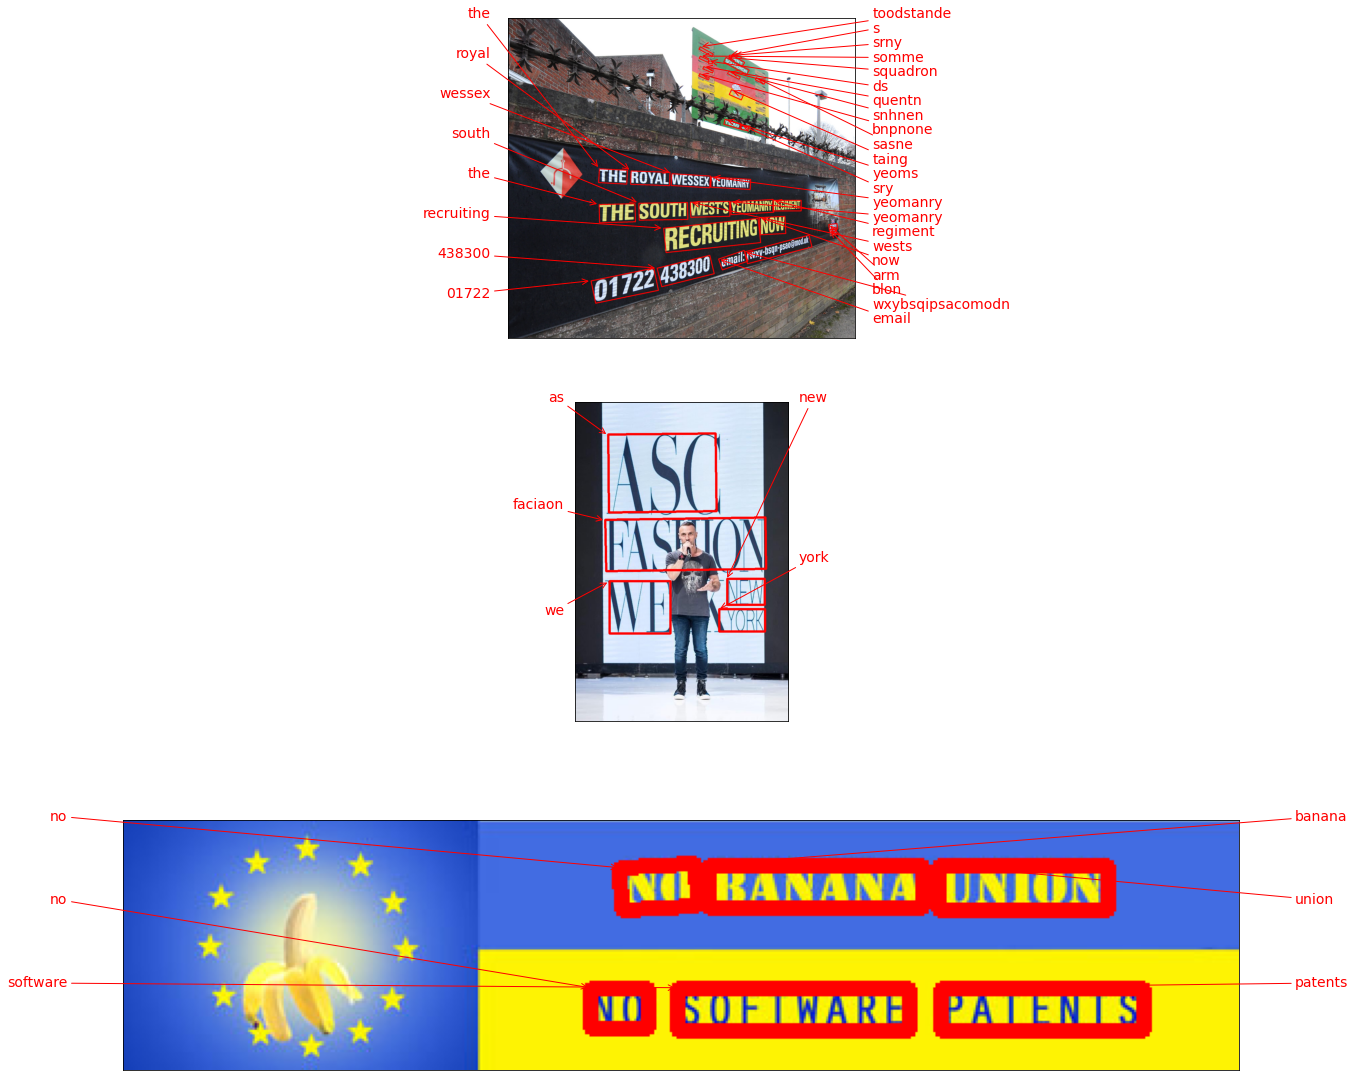

In [4]:
import matplotlib.pyplot as plt
import keras_ocr

# keras-ocr이 detector과 recognizer를 위한 모델을 자동으로 다운로드받게 됩니다. 
pipeline = keras_ocr.pipeline.Pipeline()

# 테스트에 사용할 이미지 url을 모아 봅니다. 추가로 더 모아볼 수도 있습니다. 
image_urls = [
        'https://upload.wikimedia.org/wikipedia/commons/b/bd/Army_Reserves_Recruitment_Banner_MOD_45156284.jpg',
        'https://upload.wikimedia.org/wikipedia/commons/e/e8/FseeG2QeLXo.jpg',
        'https://upload.wikimedia.org/wikipedia/commons/b/b4/EUBanana-500x112.jpg'
    ]

images = [ keras_ocr.tools.read(url) for url in image_urls]
prediction_groups = [pipeline.recognize([url]) for url in image_urls]

# 인식 결과 시각화
# Plot the predictions
fig, axs = plt.subplots(nrows=len(images), figsize=(20, 20))
for idx, ax in enumerate(axs):
    keras_ocr.tools.drawAnnotations(image=images[idx], 
                                    predictions=prediction_groups[idx][0], ax=ax)

In [39]:
img_file_paths

[&#39;./test_images/test_image_1.jpg&#39;,
 &#39;./test_images/test_image_2.jpg&#39;,
 &#39;./test_images/test_image_3.jpg&#39;,
 &#39;./test_images/test_image_4.jpg&#39;,
 &#39;./test_images/test_image_5.jpg&#39;]

In [35]:
# import keras_ocr
images = [ keras_ocr.tools.read(img) for img in img_file_paths]
prediction_groups = [pipeline.recognize([img]) for img in img_file_paths]


# 인식 결과 시각화
# Plot the predictions
fig, axs = plt.subplots(nrows=len(images), figsize=(20, 20))
for idx, ax in enumerate(axs):
    keras_ocr.tools.drawAnnotations(image=images[idx], 
                                    predictions=prediction_groups[idx][0], ax=ax)

AssertionError: Could not find image at path: /

### Tesseract

In [5]:
import os
import pytesseract
from PIL import Image
from pytesseract import Output
import matplotlib.pyplot as plt

# OCR Engine modes(–oem):
# 0 - Legacy engine only.
# 1 - Neural nets LSTM engine only.
# 2 - Legacy + LSTM engines.
# 3 - Default, based on what is available.

# Page segmentation modes(–psm):
# 0 - Orientation and script detection (OSD) only.
# 1 - Automatic page segmentation with OSD.
# 2 - Automatic page segmentation, but no OSD, or OCR.
# 3 - Fully automatic page segmentation, but no OSD. (Default)
# 4 - Assume a single column of text of variable sizes.
# 5 - Assume a single uniform block of vertically aligned text.
# 6 - Assume a single uniform block of text.
# 7 - Treat the image as a single text line.
# 8 - Treat the image as a single word.
# 9 - Treat the image as a single word in a circle.
# 10 - Treat the image as a single character.
# 11 - Sparse text. Find as much text as possible in no particular order.
# 12 - Sparse text with OSD.
# 13 - Raw line. Treat the image as a single text line, bypassing hacks that are Tesseract-specific.

def crop_word_regions(image_path='./images/sample.png', output_path='./output'):
    if not os.path.exists(output_path):
        os.mkdir(output_path)
    custom_oem_psm_config = r'--oem 3 --psm 3'
    image = Image.open(image_path)

# pytesseract 의 Output 을 사용해서 결과값의 형식을 딕셔너리(DICT) 형식으로 설정해주게 됩니다.
    recognized_data = pytesseract.image_to_data(
        image, lang='eng',    # 한국어라면 lang='kor'
        config=custom_oem_psm_config,
        output_type=Output.DICT
    )
    
    top_level = max(recognized_data['level'])
    index = 0
    cropped_image_path_list = []
    for i in range(len(recognized_data['level'])):
        level = recognized_data['level'][i]
    
        if level == top_level:
            left = recognized_data['left'][i]
            top = recognized_data['top'][i]
            width = recognized_data['width'][i]
            height = recognized_data['height'][i]
            
            output_img_path = os.path.join(output_path, f"{str(index).zfill(4)}.png")
            print(output_img_path)
            cropped_image = image.crop((
                left,
                top,
                left+width,
                top+height
            ))
            cropped_image.save(output_img_path)
            cropped_image_path_list.append(output_img_path)
            index += 1
    return cropped_image_path_list


work_dir = os.getenv('HOME')+'/aiffel/ocr_python'
img_file_path = work_dir + '/test_image.jpg'   #테스트용 이미지 경로입니다. 본인이 선택한 파일명으로 바꿔주세요. 

cropped_image_path_list = crop_word_regions(img_file_path, work_dir)

/home/aiffel0042/aiffel/ocr_python/0000.png
/home/aiffel0042/aiffel/ocr_python/0001.png
/home/aiffel0042/aiffel/ocr_python/0002.png
/home/aiffel0042/aiffel/ocr_python/0003.png
/home/aiffel0042/aiffel/ocr_python/0004.png
/home/aiffel0042/aiffel/ocr_python/0005.png
/home/aiffel0042/aiffel/ocr_python/0006.png
/home/aiffel0042/aiffel/ocr_python/0007.png
/home/aiffel0042/aiffel/ocr_python/0008.png
/home/aiffel0042/aiffel/ocr_python/0009.png
/home/aiffel0042/aiffel/ocr_python/0010.png
/home/aiffel0042/aiffel/ocr_python/0011.png
/home/aiffel0042/aiffel/ocr_python/0012.png
/home/aiffel0042/aiffel/ocr_python/0013.png
/home/aiffel0042/aiffel/ocr_python/0014.png
/home/aiffel0042/aiffel/ocr_python/0015.png


## 테스트 결과 정리

시각화 하면 더 좋을것!

## 결과 분석과 결론 제시

- 우선 여러분들이 구현하고자 하는 서비스의 목적과 내용을 먼저 정리합니다.
- 여러분들이 검토한 OCR 모델들이 그 목적에 부합하는지 확인하기 위해 필요한 평가기준을 제시합니다.
- 그 기준에 따라 위에서 정리한 테스트 결과를 분석하여 가장 나은 대안의 모델을 선정합니다.

## 결과 보고서